In [1]:
from matplotlib import pyplot as plt

In [2]:
whole_sequence = 'Tom bought 4 apples and ate 2 . He now has 2'
tokens = whole_sequence.split()
no_masks = 1
gap_len = 3
text_size_square = 20

In [3]:
def plot_offset(axs, ax_id, input_len, title):
    mask_pos = input_len
    # Parameters for squares
    size = 1  # Size of the square
    spacing = 1.1  # Spacing between squares
    for i in range(len(tokens) + no_masks):
        # Calculate bottom left corner of each square
        x = i * (size + (spacing - 1) * size)
        if i == mask_pos:  # If the square is a mask square
            square_color = 'lightgreen'
            text = '[MASK]'
            square = plt.Rectangle((x, 0), 1.5*size, size, fill=True, color=square_color,  linewidth=2)
            axs[ax_id].text(x + size * 0.75, size/2, text, ha='center', va='center', fontsize=text_size_square)
        elif i == no_masks + len(tokens) - 1:  # If the square is the last output square
            x += gap_len * size  # Add a gap between the input and output squares
            square_color = 'red'
            text = tokens[i - no_masks]
            square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color,  linewidth=2)
            axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center', fontsize=text_size_square)
        elif i >= input_len + no_masks: # If the square is an output square
            x += gap_len * size  # Add a gap between the input and output squares
            square_color = 'lightcoral'
            text = tokens[i - no_masks]
            square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color,  linewidth=2)
            axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center', fontsize=text_size_square)

        elif i < input_len + no_masks:  # If the square is an input square
            square_color = 'lightblue'
            text = tokens[i]
            square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color, linewidth=2)
            axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center', fontsize=text_size_square)

        # Inside the loop, after adding the square patch
        axs[ax_id].add_patch(square)
        axs[ax_id].arrow(input_len * spacing + no_masks * spacing * 1.5 + 0.5 * spacing, size/2, size, 0, head_width=0.1, head_length=0.2, fc='k', ec='k')
        axs[ax_id].text(input_len * spacing + no_masks * spacing * 1.5 + spacing, size/2 + 0.2, 'MLM', ha='center', va='center', fontstyle='italic', fontsize=15)

        axs[ax_id].text((len(tokens)-4) * spacing , -0.4, title, ha='center', va='center', fontstyle='italic', fontsize=25)

        # Set the axis limits to fit the squares and adjust for equal aspect ratio
        axs[ax_id].set_xlim(0, (len(tokens)+no_masks) * size * spacing + gap_len * size)
        axs[ax_id].set_ylim(0, size)
        axs[ax_id].set_aspect('equal')

        # Remove the axes for a cleaner look
        axs[ax_id].axis('off')

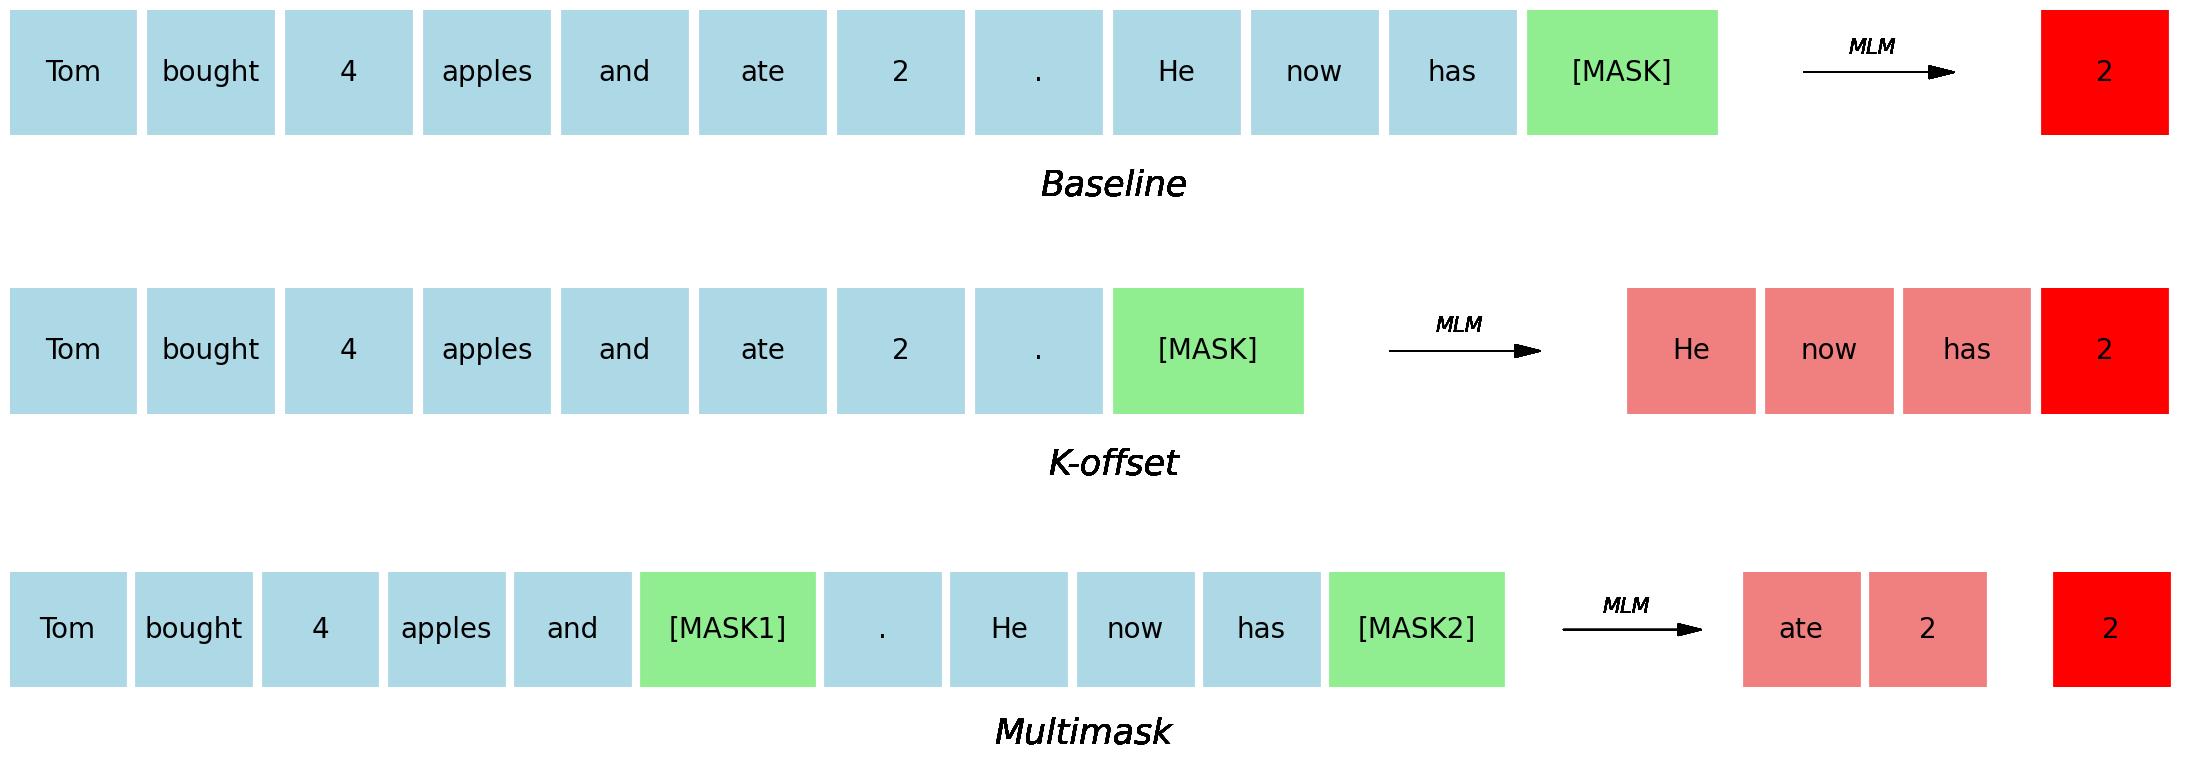

In [7]:
def plot_double_mask(axs, ax_id, input_len, title):
    tokens = ['Tom',
    'bought',
    '4',
    'apples',
    'and',
    '.',
    'He',
    'now',
    'has',
    'ate',
    '2',
    '2']
    mask_positions = [5,10]
    no_masks = len(mask_positions)
    # Parameters for squares
    size = 1  # Size of the square
    spacing = 1.1  # Spacing between squares
    for i in range(len(tokens) + no_masks):
        # Calculate bottom left corner of each square
        x = i * spacing  * size
        if i == mask_positions[0]:  # If the square is a mask square
            square_color = 'lightgreen'
            text = '[MASK1]'
            square = plt.Rectangle((x, 0), 1.5*size, size, fill=True, color=square_color,  linewidth=2)
            axs[ax_id].text(x + size * 0.75, size/2, text, ha='center', va='center', fontsize=text_size_square)
        elif i == mask_positions[1]:  # If the square is a mask square
            x += 0.5
            square_color = 'lightgreen'
            text = '[MASK2]'
            square = plt.Rectangle((x, 0), 1.5*size, size, fill=True, color=square_color,  linewidth=2)
            axs[ax_id].text(x + size * 0.75, size/2, text, ha='center', va='center', fontsize=text_size_square)
        elif i == no_masks + len(tokens) - 1:  # If the square is the last output square
            x += gap_len * size + 0.5  # Add a gap between the input and output squares
            square_color = 'red'
            text = tokens[i - no_masks]
            square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color,  linewidth=2)
            axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center', fontsize=text_size_square)
        elif i >= input_len + no_masks: # If the square is an output square
            x += gap_len * size  # Add a gap between the input and output squares
            square_color = 'lightcoral'
            text = tokens[i - no_masks]
            square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color,  linewidth=2)
            axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center', fontsize=text_size_square)

        elif i < mask_positions[0]:  # If the square is before the first mask
            square_color = 'lightblue'
            text = tokens[i]
            square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color, linewidth=2)
            axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center', fontsize=text_size_square)
        elif i < mask_positions[1]:  # If the square is between the two masks
            x += 0.5
            square_color = 'lightblue'
            text = tokens[i-1]
            square = plt.Rectangle((x, 0), size, size, fill=True, color=square_color, linewidth=2)
            axs[ax_id].text(x + size/2, size/2, text, ha='center', va='center', fontsize=text_size_square)


        # Inside the loop, after adding the square patch
        axs[ax_id].add_patch(square)
        axs[ax_id].arrow(9 * spacing + no_masks * spacing * 1.5 + 0.3 * spacing, size/2, size, 0, head_width=0.1, head_length=0.2, fc='k', ec='k')
        axs[ax_id].text(9 * spacing + no_masks * spacing * 1.5 + 0.8*spacing, size/2 + 0.2, 'MLM', ha='center', va='center', fontstyle='italic', fontsize=15)

        axs[ax_id].text(8.5 * spacing , -0.4, title, ha='center', va='center', fontstyle='italic', fontsize=25)

        # Set the axis limits to fit the squares and adjust for equal aspect ratio
        axs[ax_id].set_xlim(0, (len(tokens)+no_masks) * size * spacing + gap_len * size + 0.5)
        axs[ax_id].set_ylim(0, size)
        axs[ax_id].set_aspect('equal')

        # Remove the axes for a cleaner look
        axs[ax_id].axis('off')
fig, axs = plt.subplots(3, 1, figsize=(22, 9))  # Create two subplots vertically
# for ax_id in range(3):  # Loop over the two axes
plot_offset(axs, 0, len(tokens)-1, 'Baseline')
plot_offset(axs, 1, len(tokens)-4, 'K-offset')
plot_double_mask(axs, 2, 8,'Multimask') 
    
plt.tight_layout()
# save
plt.savefig('conditionals.png')
plt.show()

input tokens before mask

first mask position

In [5]:
tokens

['Tom',
 'bought',
 '4',
 'apples',
 'and',
 'ate',
 '2',
 '.',
 'He',
 'now',
 'has',
 '2']